<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Load-audio-from-file" data-toc-modified-id="Load-audio-from-file-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load audio from file</a></span></li><li><span><a href="#Extract-noisy-part" data-toc-modified-id="Extract-noisy-part-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract noisy part</a></span></li><li><span><a href="#Reduce-noise" data-toc-modified-id="Reduce-noise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reduce noise</a></span></li><li><span><a href="#Compare-two-audios-before-and-after-noise-reduction" data-toc-modified-id="Compare-two-audios-before-and-after-noise-reduction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare two audios before and after noise reduction</a></span></li><li><span><a href="#Save-audio-back-to-file" data-toc-modified-id="Save-audio-back-to-file-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Save audio back to file</a></span></li></ul></div>

# Load libraries

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import noisereduce as nr

D:\Python\Anaconda3\envs\py3.7\lib\site-packages\noisereduce\noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Load audio from file

In [2]:
DEFAULT_SAMPLING_RATE = 22050
FRAME_SIZE = 512
HOP_LENGTH = 256

In [3]:
data_dir = "./data/"
file_path = data_dir + "waveform/17021324_NguyenHongQuan/02/1.npy"

In [4]:
waveform = np.load(file_path)

In [5]:
waveform.shape

(154351,)

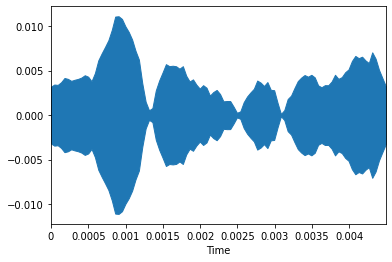

In [6]:
librosa.display.waveplot(waveform[10000:10000+100], sr=DEFAULT_SAMPLING_RATE)

In [7]:
ipd.Audio(waveform, rate=DEFAULT_SAMPLING_RATE)

# Extract noisy part

In [8]:
noisy_waveform = waveform[int(DEFAULT_SAMPLING_RATE*5.3):int(DEFAULT_SAMPLING_RATE*5.7)]

In [9]:
ipd.Audio(noisy_waveform, rate=DEFAULT_SAMPLING_RATE)

# Reduce noise

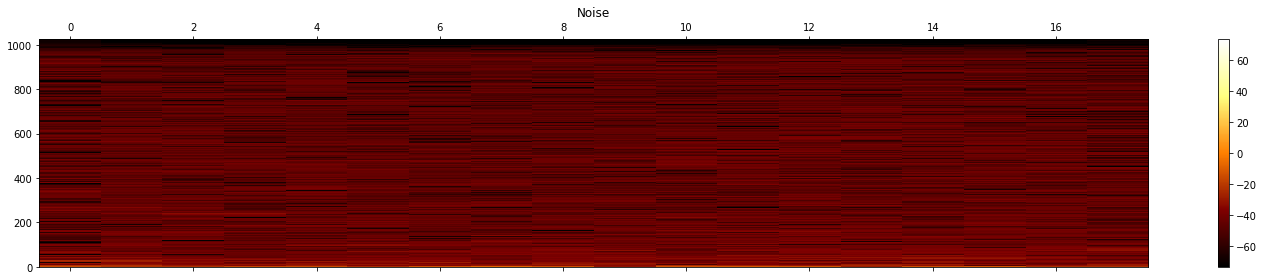

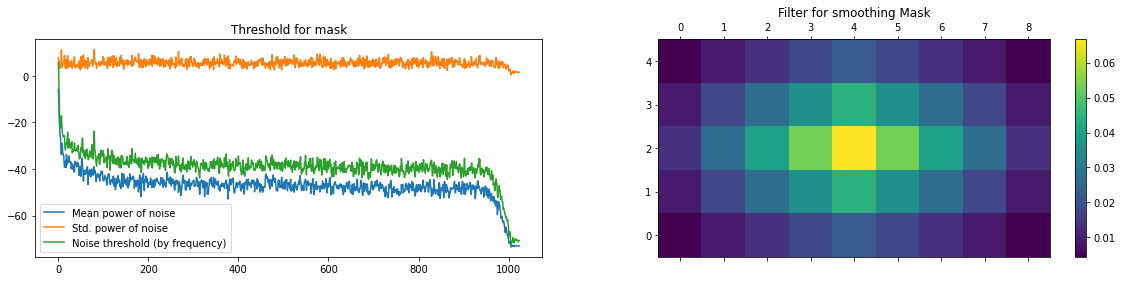

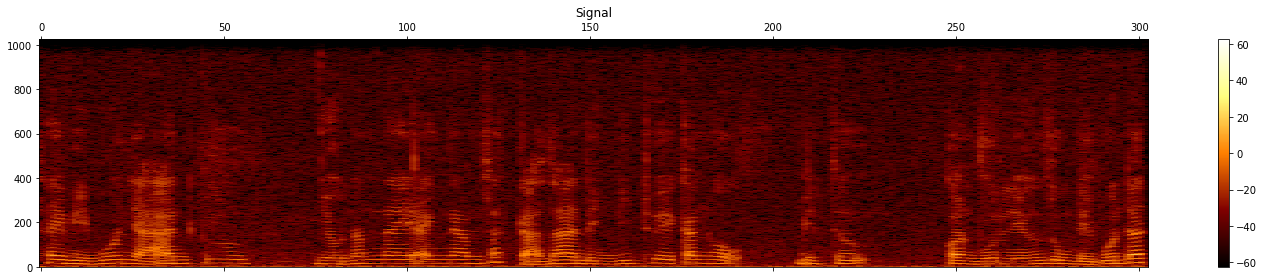

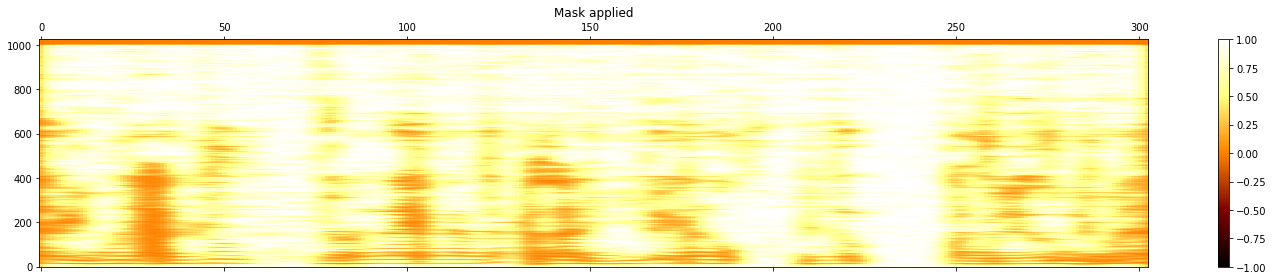

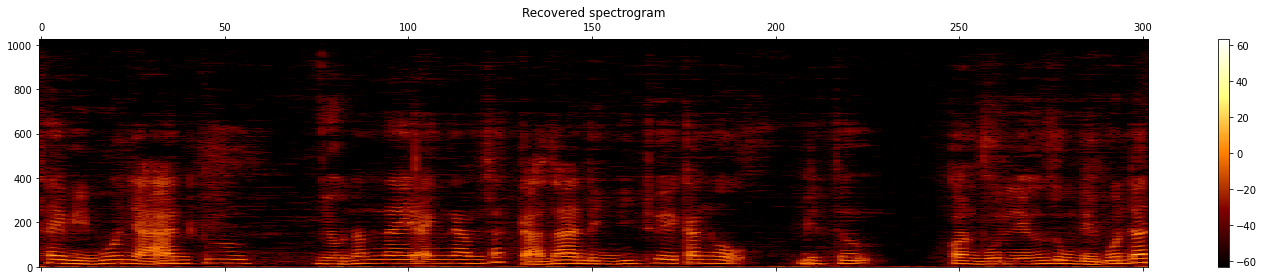

In [10]:
reduced_noise_waveform = nr.reduce_noise(audio_clip=waveform,
                                         noise_clip=noisy_waveform,
                                         #n_fft=FRAME_SIZE,
                                         #hop_length=HOP_LENGTH,
                                         verbose=True)

# Compare two audios before and after noise reduction

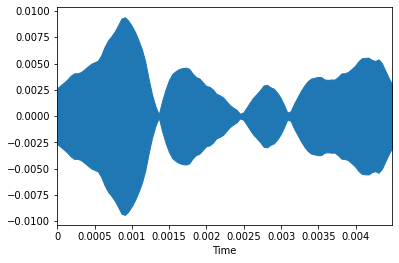

In [11]:
librosa.display.waveplot(reduced_noise_waveform[10000:10000+100], sr=DEFAULT_SAMPLING_RATE)

In [12]:
ipd.Audio(waveform, rate=DEFAULT_SAMPLING_RATE)

In [13]:
ipd.Audio(reduced_noise_waveform, rate=DEFAULT_SAMPLING_RATE)

# Save audio back to file

In [14]:
np.save(file_path, reduced_noise_waveform)